<a href="https://colab.research.google.com/github/afanyulionel/cats-vs-dogs-model/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os


In [6]:
os.listdir('/content/')

['.config', 'drive', 'sample_data']

# **Model building**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from keras.layers import Dense, Flatten
from keras.models import Model # Functonal api
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import keras


In [4]:
base_model = InceptionV3(input_shape=(255, 255, 3), include_top=False)


87910968/87910968 [==============================] - 0s 0us/step


In [8]:
for layer in base_model.layers:
  layer.trainable = False


In [ ]:
X = Flatten()(base_model.output)
x = Dense(units=2, activation='sigmoid')(X)

# Final model
model = Model(base_model.input, x)

# compile the model
model.compile(optimizer= 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

# model summary
model.summary()

# Pre-process data using datagenerator

In [34]:
train_datagen = ImageDataGenerator(
    featurewise_center = True,
    width_shift_range=0.3,
    rotation_range = 0.4,
    horizontal_flip = True,
    preprocessing_function = preprocess_input,
    zoom_range = 0.4,
    shear_range = 0.4 
)

PARENT = '/content/drive/MyDrive/Colab Notebooks'
TRAINING = "".join([PARENT, '/training'])
TESTING = "".join([PARENT, '/testing'])
test_cat_img = "".join([TESTING, '/cats/cat.4008.jpg'])
test_dog_img = "".join([TESTING, '/dogs/dog.4008.jpg'])

train_data = train_datagen.flow_from_directory(directory=TRAINING, target_size=(256,256), batch_size=8)

Found 156 images belonging to 2 classes.


In [11]:
train_data.class_indices

{'cats': 0, 'dogs': 1}

# Visualizing the data

In [20]:
t_img, label = train_data.next()

In [21]:
def plotImages(img_arr, label):
  """
  input: image array
  output: plot images
  """

  for idx, img in enumerate(img_arr):
    if idx <=10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

In [ ]:
plotImages(t_img, label)

# Model checkpoint

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(
    filepath = "./best_model.h5",
    monitor = "accuracy",
    verbose = 1,
    save_best_only = True
)
es = EarlyStopping(
    monitor = "accuracy",
    min_delta = 0.01,
    patience = 5,
    verbose = 1
)

cb = [mc, es]

In [25]:
his = model.fit(
    train_data, 
    steps_per_epoch = 5, 
    epochs = 20,
    callbacks = cb
)

Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 2.1243 - accuracy: 0.8750
Epoch 1: accuracy did not improve from 0.92949
5/5 [==============================] - 1s 152ms/step - loss: 2.1243 - accuracy: 0.8750
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 0.2464 - accuracy: 0.9500
Epoch 2: accuracy improved from 0.92949 to 0.95000, saving model to ./best_model.h5
5/5 [==============================] - 1s 291ms/step - loss: 0.2464 - accuracy: 0.9500
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 0.5638 - accuracy: 0.9444
Epoch 3: accuracy did not improve from 0.95000
5/5 [==============================] - 1s 132ms/step - loss: 0.5638 - accuracy: 0.9444
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 0.2861 - accuracy: 0.9750
Epoch 4: accuracy improved from 0.95000 to 0.97500, saving model to ./best_model.h5
5/5 [==============================] - 1s 294ms/step - loss: 0.2861 - accuracy: 0.9750
Epoch 5/20
5/5 [======

In [26]:
from keras.models import load_model
model = load_model('./best_model.h5')

In [27]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

<ipython-input-29-97ca5847fe0b>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['loss'], 'go--', c = 'b')
<ipython-input-29-97ca5847fe0b>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'], 'go--', c = 'r')


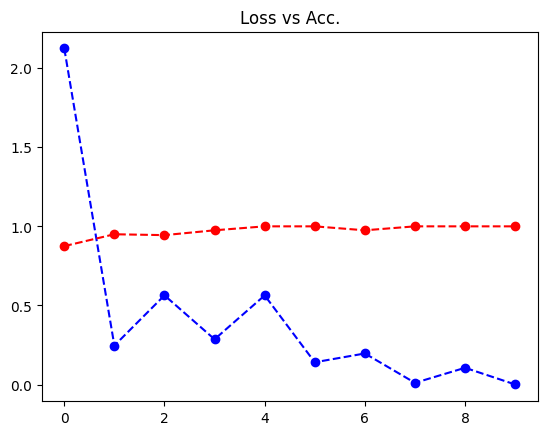

In [29]:
plt.plot(h['loss'], 'go--', c = 'b')
plt.plot(h['accuracy'], 'go--', c = 'r')
plt.title("Loss vs Acc.")
plt.show()

# Validate our model

In [45]:
# Path for the image to see if it predicts the correct class

img = load_img(test_dog_img, target_size=(255, 255))
i = img_to_array(img)
i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

(1, 255, 255, 3)

In [46]:
pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Image is a cat")
else:
  print("Image is a dog")

1/1 [==============================] - 0s 38ms/step
Image is a dog


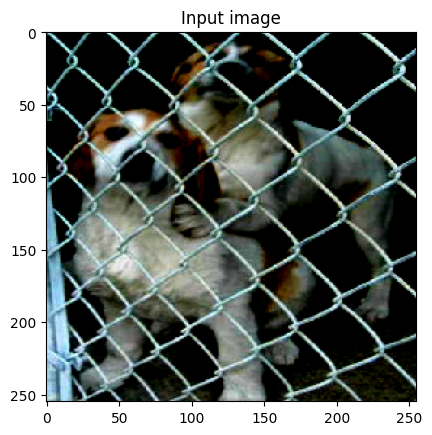

In [47]:
# Display the image

plt.imshow(input_arr[0])
plt.title('Input image')
plt.show()

In [48]:
print(input_arr)

[[[[ 0.5764706   0.8745098   0.8980392 ]
   [ 0.38823533  0.6627451   0.69411767]
   [-0.05882353  0.21568632  0.24705887]
   ...
   [-0.9764706  -0.96862745 -0.9529412 ]
   [-0.9764706  -0.96862745 -0.9529412 ]
   [-0.9764706  -0.96862745 -0.9529412 ]]

  [[-0.09803921  0.20000005  0.20784318]
   [ 0.6392157   0.9137255   0.92941177]
   [ 0.60784316  0.8666667   0.90588236]
   ...
   [-0.9764706  -0.9607843  -0.96862745]
   [-0.9764706  -0.9607843  -0.96862745]
   [-0.9764706  -0.9607843  -0.96862745]]

  [[-0.88235295 -0.6        -0.6156863 ]
   [ 0.18431377  0.45098042  0.45882356]
   [ 0.45882356  0.7254902   0.73333335]
   ...
   [-0.9764706  -0.9607843  -0.96862745]
   [-0.9764706  -0.9607843  -0.96862745]
   [-0.9764706  -0.9607843  -0.96862745]]

  ...

  [[ 0.73333335  0.92156863  0.9372549 ]
   [ 0.73333335  0.8980392   0.92156863]
   [ 0.77254903  0.92941177  0.9372549 ]
   ...
   [ 0.04313731  0.05098045 -0.05882353]
   [ 0.05098045  0.05882359 -0.05098039]
   [ 0.07450986 